**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
!pip install python-decouple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn
seaborn.set_context('talk')

from decouple import config
from sqlalchemy import create_engine, text

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [ ]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



##1- Creamos una BD en SQLite

In [ ]:
engine = create_engine('sqlite:///myDataBase.sqlite', echo=True)
connection = engine.connect()

##2- Ingesta de datos

In [ ]:
# Creamos una tabla para Melb
melb_df.to_sql('melb', con=engine, if_exists="replace")

2022-08-19 12:23:18,375 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("melb")


2022-08-19 12:23:18,385 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-19 12:23:18,391 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("melb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("melb")


2022-08-19 12:23:18,399 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-19 12:23:18,415 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-19 12:23:18,424 INFO sqlalchemy.engine.Engine 
CREATE TABLE melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




2022-08-19 12:23:18,434 INFO sqlalchemy.engine.Engine [no key 0.00957s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00957s] ()


2022-08-19 12:23:18,457 INFO sqlalchemy.engine.Engine CREATE INDEX ix_melb_index ON melb ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_melb_index ON melb ("index")


2022-08-19 12:23:18,464 INFO sqlalchemy.engine.Engine [no key 0.00726s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00726s] ()


2022-08-19 12:23:18,481 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-08-19 12:23:18,521 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-19 12:23:19,030 INFO sqlalchemy.engine.Engine INSERT INTO melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2022-08-19 12:23:19,035 INFO sqlalchemy.engine.Engine [generated in 0.46349s] ((0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8

INFO:sqlalchemy.engine.Engine:[generated in 0.46349s] ((0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8072, 144.9941, 'Northern

2022-08-19 12:23:19,154 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


In [ ]:
# Creamos un dataFrame con los datos extraidos de Airbnb
airbnb_df = pd.read_csv("https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv")
airbnb_df[:3]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,...,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,...,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,...,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,17,0.15


In [ ]:
# Creamos una tabla a partir del dataFrame de Airbnb
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

2022-08-19 12:23:29,361 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("airbnb")


2022-08-19 12:23:29,370 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-19 12:23:29,380 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("airbnb")


2022-08-19 12:23:29,385 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-08-19 12:23:29,423 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-19 12:23:29,435 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb (
	"index" BIGINT, 
	id BIGINT, 
	listing_url TEXT, 
	scrape_id FLOAT, 
	last_scraped TEXT, 
	name TEXT, 
	summary TEXT, 
	space TEXT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	notes TEXT, 
	transit TEXT, 
	access TEXT, 
	interaction TEXT, 
	house_rules TEXT, 
	picture_url TEXT, 
	host_id BIGINT, 
	host_url TEXT, 
	host_name TEXT, 
	host_since TEXT, 
	host_location TEXT, 
	host_about TEXT, 
	host_response_time TEXT, 
	host_response_rate TEXT, 
	host_is_superhost TEXT, 
	host_thumbnail_url TEXT, 
	host_picture_url TEXT, 
	host_neighborhood TEXT, 
	host_verifications TEXT, 
	host_has_profile_pic TEXT, 
	host_identity_verified TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	smart_location TEXT, 
	country_code TEXT, 
	country TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	is_location_exact TEXT, 
	property_type TEXT, 
	room_type TEXT, 
	accommodates BIGIN

INFO:sqlalchemy.engine.Engine:
CREATE TABLE airbnb (
	"index" BIGINT, 
	id BIGINT, 
	listing_url TEXT, 
	scrape_id FLOAT, 
	last_scraped TEXT, 
	name TEXT, 
	summary TEXT, 
	space TEXT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	notes TEXT, 
	transit TEXT, 
	access TEXT, 
	interaction TEXT, 
	house_rules TEXT, 
	picture_url TEXT, 
	host_id BIGINT, 
	host_url TEXT, 
	host_name TEXT, 
	host_since TEXT, 
	host_location TEXT, 
	host_about TEXT, 
	host_response_time TEXT, 
	host_response_rate TEXT, 
	host_is_superhost TEXT, 
	host_thumbnail_url TEXT, 
	host_picture_url TEXT, 
	host_neighborhood TEXT, 
	host_verifications TEXT, 
	host_has_profile_pic TEXT, 
	host_identity_verified TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	smart_location TEXT, 
	country_code TEXT, 
	country TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	is_location_exact TEXT, 
	property_type TEXT, 
	room_type TEXT, 
	accommodates BIGINT, 
	bathrooms FLOAT, 
	

2022-08-19 12:23:29,445 INFO sqlalchemy.engine.Engine [no key 0.00943s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00943s] ()


2022-08-19 12:23:29,474 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_index ON airbnb ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_airbnb_index ON airbnb ("index")


2022-08-19 12:23:29,477 INFO sqlalchemy.engine.Engine [no key 0.00332s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00332s] ()


2022-08-19 12:23:29,498 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-08-19 12:23:29,825 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-08-19 12:23:36,847 INFO sqlalchemy.engine.Engine INSERT INTO airbnb ("index", id, listing_url, scrape_id, last_scraped, name, summary, space, description, neighborhood_overview, notes, transit, access, interaction, house_rules, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighborhood, host_verifications, host_has_profile_pic, host_identity_verified, street, neighborhood, city, suburb, state, zipcode, smart_location, country_code, country, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, price, weekly_price, monthly_price, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, maximum_nights, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, first_

INFO:sqlalchemy.engine.Engine:INSERT INTO airbnb ("index", id, listing_url, scrape_id, last_scraped, name, summary, space, description, neighborhood_overview, notes, transit, access, interaction, house_rules, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighborhood, host_verifications, host_has_profile_pic, host_identity_verified, street, neighborhood, city, suburb, state, zipcode, smart_location, country_code, country, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, price, weekly_price, monthly_price, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, maximum_nights, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, first_review, last_review, rev

2022-08-19 12:23:36,854 INFO sqlalchemy.engine.Engine [generated in 6.35885s] ((0, 9835, 'https://www.airbnb.com/rooms/9835', 20181200000000.0, '12/7/2018', 'Beautiful Room & House', None, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', None, 'YES ! The bus (305,309) is exactly two blocks away and is very frequent', "Kitch

INFO:sqlalchemy.engine.Engine:[generated in 6.35885s] ((0, 9835, 'https://www.airbnb.com/rooms/9835', 20181200000000.0, '12/7/2018', 'Beautiful Room & House', None, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', None, 'YES ! The bus (305,309) is exactly two blocks away and is very frequent', "Kitchen, backyard, upstairs l

2022-08-19 12:23:39,702 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


##3- Consultas con SQL

Registros totales por ciudad


In [ ]:
registrostotales_ciudad = "SELECT City, COUNT(*) FROM Airbnb GROUP BY City ORDER BY COUNT(*) Desc"

with engine.connect() as connection:
    cities = connection.execute(registrostotales_ciudad)
    for city in cities:
        print (city)


2022-08-19 12:23:40,246 INFO sqlalchemy.engine.Engine SELECT City, COUNT(*) FROM Airbnb GROUP BY City ORDER BY COUNT(*) Desc


INFO:sqlalchemy.engine.Engine:SELECT City, COUNT(*) FROM Airbnb GROUP BY City ORDER BY COUNT(*) Desc


2022-08-19 12:23:40,263 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()
ERROR:sqlalchemy.pool.impl.NullPool:Exception during reset or similar
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/pool/base.py", line 739, in _finalize_fairy
    fairy._reset(pool)
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/pool/base.py", line 988, in _reset
    pool._dialect.do_rollback(self)
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/default.py", line 682, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140107414660992 and this is thread id 140106990241536.
ERROR:sqlalchemy.pool.impl.NullPool:Exception closing connection <sqlite3.Connection object at 0x7f6d1f1fe2d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/pool/base.py", line 739, in _finalize_fairy
    fairy._reset(pool)
  

('Melbourne', 7368)
('Port Phillip', 2808)
('Yarra', 2049)
('Stonnington', 1621)
('Moreland', 967)
('Yarra Ranges', 771)
('Darebin', 698)
('Boroondara', 664)
('Glen Eira', 631)
('Whitehorse', 614)
('Monash', 571)
('Maribyrnong', 436)
('Wyndham', 426)
('Bayside', 375)
('Moonee Valley', 344)
('Manningham', 313)
('Kingston', 309)
('Hobsons Bay', 239)
('Banyule', 203)
('Frankston', 177)
('Knox', 175)
('Hume', 170)
('Casey', 153)
('Greater Dandenong', 147)
('Whittlesea', 137)
('Cardinia', 123)
('Maroondah', 115)
('Brimbank', 108)
('Melton', 95)
('Nillumbik', 88)


Cantidad de registros totales por barrio y ciudad

In [ ]:
registrostotales_ciudadbarrio = "SELECT City, neighborhood, COUNT(*) AS Count FROM Airbnb GROUP BY City, neighborhood ORDER BY City, neighborhood"

df = pd.read_sql_query(registrostotales_ciudadbarrio, engine)
print(df)


2022-08-19 12:23:40,532 INFO sqlalchemy.engine.Engine SELECT City, neighborhood, COUNT(*) AS Count FROM Airbnb GROUP BY City, neighborhood ORDER BY City, neighborhood


INFO:sqlalchemy.engine.Engine:SELECT City, neighborhood, COUNT(*) AS Count FROM Airbnb GROUP BY City, neighborhood ORDER BY City, neighborhood


2022-08-19 12:23:40,542 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


             city   neighborhood  Count
0         Banyule           None    174
1         Banyule     Alphington     16
2         Banyule        Preston      8
3         Banyule      Thornbury      5
4         Bayside           None    170
..            ...            ...    ...
129         Yarra        Fitzroy    381
130         Yarra  Fitzroy North    225
131         Yarra      Northcote      6
132         Yarra       Richmond    547
133  Yarra Ranges           None    771

[134 rows x 3 columns]


##4- Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL

In [ ]:
joinQuery = '''
SELECT * FROM melb LEFT JOIN 

( SELECT 
     zipcode as zipcode_int, 
	   AVG(airbnb.price) AS airbnb_price_mean, 
     COUNT(*) AS airbnb_record_count, 
	   AVG(weekly_price) AS airbnb_weekly_price_mean,
     AVG(monthly_price) AS airbnb_monthly_price_mean
  FROM airbnb
      GROUP BY zipcode_int
    ) AS airbnb_price_by_zipcode

ON airbnb_price_by_zipcode.zipcode_int = CAST(melb.Postcode AS INT)'''

joinDf = pd.read_sql_query(joinQuery, engine)
print(joinDf)

2022-08-19 12:23:40,789 INFO sqlalchemy.engine.Engine 
SELECT * FROM melb LEFT JOIN 

( SELECT 
     zipcode as zipcode_int, 
	   AVG(airbnb.price) AS airbnb_price_mean, 
     COUNT(*) AS airbnb_record_count, 
	   AVG(weekly_price) AS airbnb_weekly_price_mean,
     AVG(monthly_price) AS airbnb_monthly_price_mean
  FROM airbnb
      GROUP BY zipcode_int
    ) AS airbnb_price_by_zipcode

ON airbnb_price_by_zipcode.zipcode_int = CAST(melb.Postcode AS INT)


INFO:sqlalchemy.engine.Engine:
SELECT * FROM melb LEFT JOIN 

( SELECT 
     zipcode as zipcode_int, 
	   AVG(airbnb.price) AS airbnb_price_mean, 
     COUNT(*) AS airbnb_record_count, 
	   AVG(weekly_price) AS airbnb_weekly_price_mean,
     AVG(monthly_price) AS airbnb_monthly_price_mean
  FROM airbnb
      GROUP BY zipcode_int
    ) AS airbnb_price_by_zipcode

ON airbnb_price_by_zipcode.zipcode_int = CAST(melb.Postcode AS INT)


2022-08-19 12:23:40,798 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


       index        Suburb          Address  Rooms Type      Price Method  \
0          0    Abbotsford     85 Turner St      2    h  1480000.0      S   
1          0    Abbotsford     85 Turner St      2    h  1480000.0      S   
2          1    Abbotsford  25 Bloomburg St      2    h  1035000.0      S   
3          1    Abbotsford  25 Bloomburg St      2    h  1035000.0      S   
4          2    Abbotsford     5 Charles St      3    h  1465000.0     SP   
...      ...           ...              ...    ...  ...        ...    ...   
26866  13577  Williamstown      83 Power St      3    h  1170000.0      S   
26867  13578  Williamstown     96 Verdon St      4    h  2500000.0     PI   
26868  13578  Williamstown     96 Verdon St      4    h  2500000.0     PI   
26869  13579    Yarraville       6 Agnes St      4    h  1285000.0     SP   
26870  13579    Yarraville       6 Agnes St      4    h  1285000.0     SP   

       SellerG        Date  Distance  ...  CouncilArea  Lattitude  Longtitu

## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

In [ ]:
melb_df.shape

(13580, 21)

In [ ]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


###1-Analizar Outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


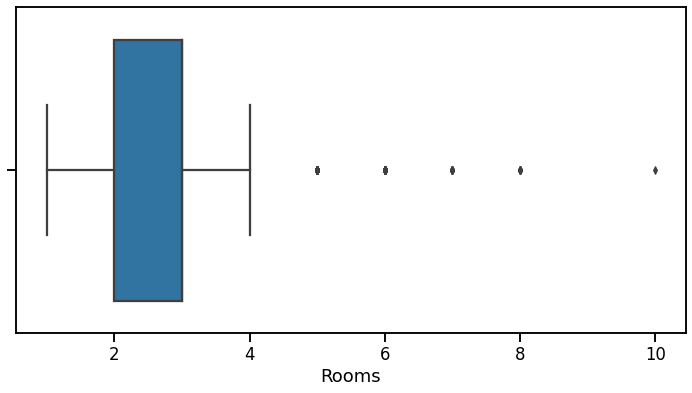

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(melb_df['Rooms'])
plt.ticklabel_format(style='plain', axis='x')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


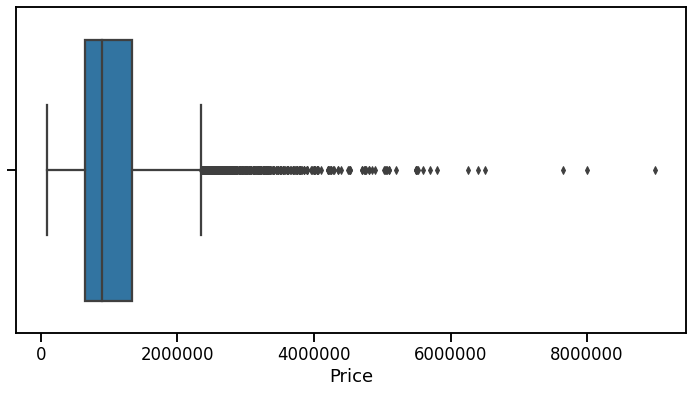

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(melb_df['Price'])
plt.ticklabel_format(style='plain', axis='x')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


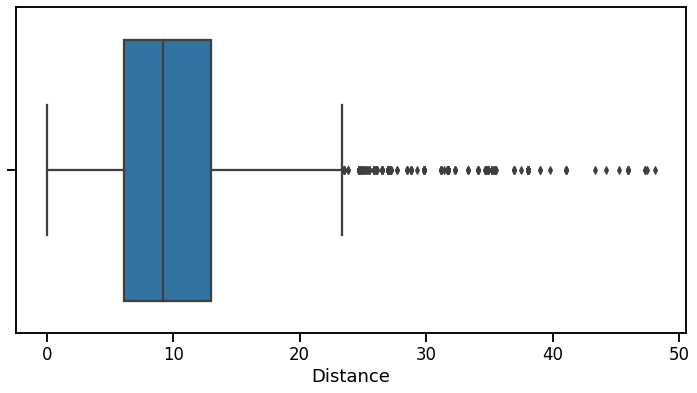

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(melb_df['Distance'])
plt.ticklabel_format(style='plain', axis='x')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


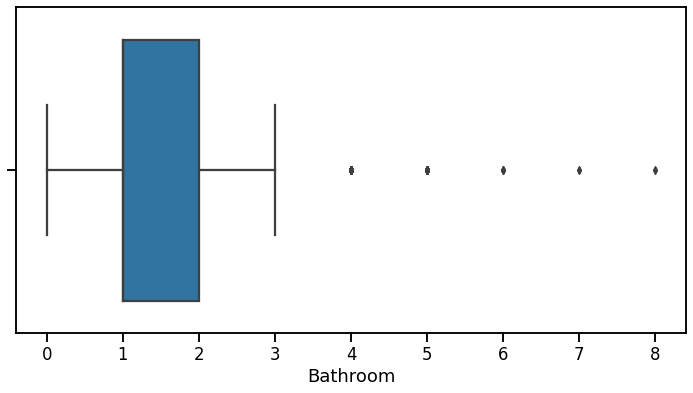

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(melb_df['Bathroom'])
plt.ticklabel_format(style='plain', axis='x')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


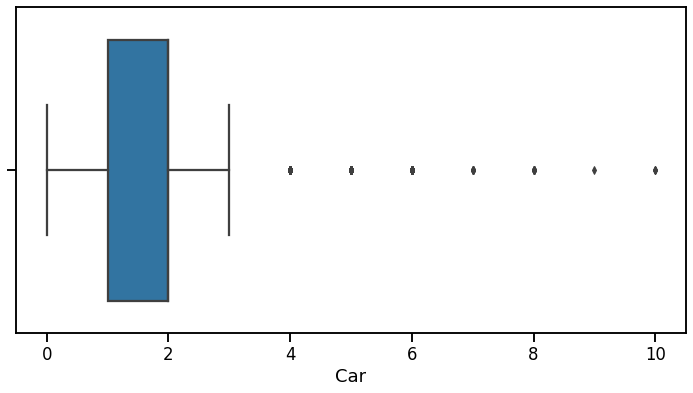

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(melb_df['Car'])
plt.ticklabel_format(style='plain', axis='x')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


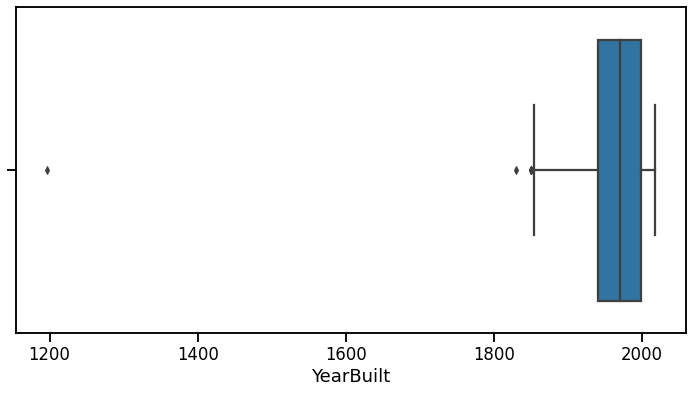

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(melb_df['YearBuilt'])
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
melb_df.sort_values(by=["YearBuilt"],ascending=[True])[:10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9968,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,...,1.0,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0
2079,Collingwood,2/79 Oxford St,2,u,855000.0,S,Nelson,3/09/2016,1.6,3066.0,...,1.0,1.0,2886.0,122.0,1830.0,Yarra,-37.80420,144.98450,Northern Metropolitan,4553.0
5860,St Kilda,51/167 Fitzroy St,3,u,1600000.0,PI,Kay,25/02/2017,6.1,3182.0,...,2.0,2.0,0.0,3.0,1850.0,Port Phillip,-37.85840,144.98020,Southern Metropolitan,13240.0
4843,Prahran,602/220 Commercial Rd,2,u,841000.0,S,hockingstuart,18/03/2017,4.5,3181.0,...,2.0,1.0,0.0,101.0,1850.0,Stonnington,-37.84700,144.99360,Southern Metropolitan,7717.0
2554,Fitzroy,11 Henry St,2,h,677000.0,S,Chambers,27/11/2016,1.6,3065.0,...,1.0,0.0,67.0,NaN,1850.0,Yarra,-37.79690,144.97590,Northern Metropolitan,5825.0
5405,Richmond,22a Stanley St,3,h,1600000.0,S,Biggin,24/09/2016,2.6,3121.0,...,2.0,2.0,80.0,144.0,1850.0,Yarra,-37.82330,144.99470,Northern Metropolitan,14949.0
2530,Fitzroy,52 Nicholson St,4,h,3310000.0,S,Caine,13/08/2016,1.6,3065.0,...,4.0,2.0,337.0,291.0,1854.0,Yarra,-37.80520,144.97390,Northern Metropolitan,5825.0
5536,South Melbourne,352 Moray St,4,h,2260000.0,PI,Marshall,7/05/2016,2.1,3205.0,...,3.0,0.0,190.0,232.0,1856.0,Port Phillip,-37.83770,144.96530,Southern Metropolitan,5943.0
12158,South Melbourne,147 Bank St,3,h,2200000.0,VB,Marshall,29/07/2017,1.9,3205.0,...,2.0,1.0,195.0,NaN,1857.0,Port Phillip,-37.83381,144.96287,Southern Metropolitan,5943.0
8583,Carlton,2/100 Keppel St,2,t,960000.0,VB,Nelson,20/05/2017,1.8,3053.0,...,2.0,1.0,0.0,90.0,1860.0,Melbourne,-37.79470,144.97240,Northern Metropolitan,6786.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


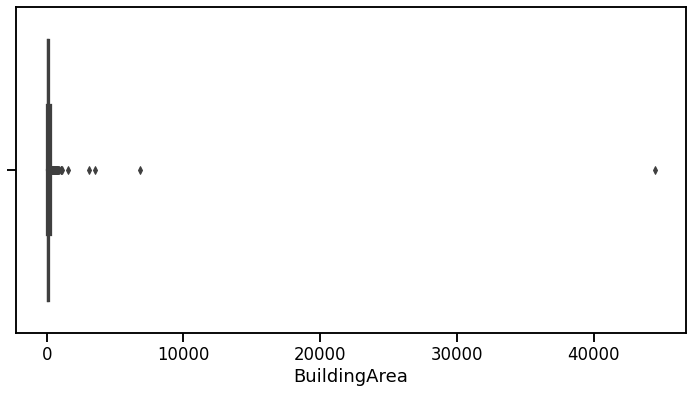

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(melb_df['BuildingArea'])
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
melb_df.sort_values(by=["BuildingArea"],ascending=[False])[:10]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,3.0,5.0,44500.0,44515.0000,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0
1484,Bulleen,19 Warringal St,4,h,1280000.0,S,Barry,11/03/2017,11.8,3105.0,...,1.0,2.0,732.0,6791.0000,NaN,Manningham,-37.76150,145.08970,Eastern Metropolitan,4480.0
2560,Fitzroy North,186 Queens Pde,2,t,930000.0,S,Nelson,3/09/2016,3.5,3068.0,...,3.0,0.0,2778.0,3558.0000,NaN,Yarra,-37.79030,144.98590,Northern Metropolitan,6244.0
1588,Camberwell,46 Athelstan Rd,5,h,2608000.0,S,Marshall,15/10/2016,7.8,3124.0,...,2.0,4.0,730.0,3112.0000,1920.0,Boroondara,-37.84240,145.06390,Southern Metropolitan,8920.0
2234,Elsternwick,5/16 St Georges Rd,2,u,741000.0,S,Biggin,16/04/2016,8.5,3185.0,...,1.0,1.0,0.0,1561.0000,1966.0,Glen Eira,-37.88290,145.00330,Southern Metropolitan,4898.0
2830,Glen Iris,1/58 Edgar St N,2,t,600000.0,VB,Gary,22/08/2016,9.2,3146.0,...,1.0,1.0,0.0,1143.0000,NaN,Stonnington,-37.85060,145.04650,Southern Metropolitan,10412.0
1368,Brunswick,7 Garnet St,3,h,1053000.0,S,Ray,27/06/2016,5.2,3056.0,...,1.0,1.0,343.0,1041.0000,1925.0,Moreland,-37.75890,144.95290,Northern Metropolitan,11918.0
3640,Kew,24 Fitzwilliam St,5,h,1975000.0,S,Kay,18/06/2016,5.6,3101.0,...,2.0,1.0,531.0,1022.0000,1890.0,Boroondara,-37.81300,145.04110,Southern Metropolitan,10331.0
12064,Lalor,52 Monash St,3,h,580500.0,S,Love,29/07/2017,16.3,3075.0,...,1.0,1.0,532.0,934.0000,1980.0,Whittlesea,-37.66101,145.02568,Northern Metropolitan,8279.0
10920,Brighton,23 Arthur Av,5,h,3000000.0,VB,Buxton,12/08/2017,10.5,3186.0,...,3.0,2.0,818.0,826.8367,NaN,Bayside,-37.92335,144.99982,Southern Metropolitan,10579.0


In [ ]:
clean_melb_df = melb_df[(melb_df['Rooms']<=6) & (melb_df['Price']<=3000000) & (melb_df['Distance']<=24) & (melb_df['Car']<4)]
clean_melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,Werribee,5 Nuragi Ct,4,h,635000.0,S,hockingstuart,26/08/2017,14.7,3030.0,...,2.0,1.0,662.0,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan,16166.0
13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,3049.0,...,2.0,2.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,Northern Metropolitan,2474.0
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0


##### Nota: Al intentar excluir valores en Yearbuilt y BuildingArea se reduce considerablemente la base por presencias de NaN por lo que no fueron acotadas.

###2- Analizamos el DataSet de Airbnb

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22895 non-null  int64  
 1   listing_url                       22895 non-null  object 
 2   scrape_id                         22895 non-null  float64
 3   last_scraped                      22895 non-null  object 
 4   name                              22892 non-null  object 
 5   summary                           22199 non-null  object 
 6   space                             16844 non-null  object 
 7   description                       22563 non-null  object 
 8   neighborhood_overview             14424 non-null  object 
 9   notes                             11546 non-null  object 
 10  transit                           14943 non-null  object 
 11  access                            15168 non-null  object 
 12  inte

In [ ]:
airbnb_df["zipcode"] = pd.to_numeric(airbnb_df["zipcode"], errors="coerce") #convertimos la columna zipcode a tipo numerico para estandarizar los datos y luego mergear los datasets

In [ ]:
relevant_airbnb_df = airbnb_df[["neighborhood", "zipcode", "price", "weekly_price", "monthly_price"]]

In [ ]:
airbnb_prices = relevant_airbnb_df.groupby('zipcode').agg(
       airbnb_count=('zipcode','count'),
       airbnb_price_median=('price', 'median'),
       airbnb_price_min=('price', 'min'),
       airbnb_price_max=('price', 'max'),
       airbnb_weekly_price_median=('weekly_price', 'median'),
       airbnb_weekly_min=('weekly_price', 'min'),
       airbnb_weekly_max=('weekly_price', 'max'),
       airbnb_monthly_price_median=('monthly_price', 'median'),
       airbnb_monthly_price_min=('monthly_price', 'min'),
       airbnb_monthly_price_max=('monthly_price', 'max')).reset_index()

airbnb_prices

,zipcode,airbnb_count,airbnb_price_median,airbnb_price_min,airbnb_price_max,airbnb_weekly_price_median,airbnb_weekly_min,airbnb_weekly_max,airbnb_monthly_price_median,airbnb_monthly_price_min,airbnb_monthly_price_max
0,2010.0,1,40.0,40,40,NaN,NaN,NaN,NaN,NaN,NaN
1,2134.0,1,50.0,50,50,NaN,NaN,NaN,NaN,NaN,NaN
2,2582.0,1,104.0,104,104,NaN,NaN,NaN,NaN,NaN,NaN
3,3000.0,3367,129.0,0,9000,857.0,150.0,3325.0,3469.0,550.0,8060.0
4,3001.0,2,132.5,120,145,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
242,7367.0,1,230.0,230,230,NaN,NaN,NaN,NaN,NaN,NaN
243,8938.0,1,296.0,296,296,NaN,NaN,NaN,NaN,NaN,NaN
244,9004.0,1,226.0,226,226,NaN,NaN,NaN,NaN,NaN,NaN
245,9540.0,1,245.0,245,245,NaN,NaN,NaN,NaN,NaN,NaN


Analizamos y filtramos los Zip Code con pocos inmuebles

In [ ]:
airbnb_prices["airbnb_count"].value_counts()

1      20
6       8
7       8
5       6
11      6
       ..
308     1
297     1
387     1
267     1
33      1
Name: airbnb_count, Length: 113, dtype: int64

Para no perder tantos datos, eliminamos los codigos postales que tienen menos de 2 inmuebles (20 ZipCodes)

In [ ]:
rows_to_remove =  airbnb_prices[airbnb_prices["airbnb_count"]<2].index
rows_to_remove

Int64Index([  0,   1,   2,  79, 172, 187, 199, 203, 229, 236, 237, 238, 239,
            240, 241, 242, 243, 244, 245, 246],
           dtype='int64')

In [ ]:
rows_to_remove =  airbnb_prices[airbnb_prices["airbnb_count"]<2].index
airbnb_prices.drop(rows_to_remove, inplace=True)

**Unimos el dataset de Melbourn con el de Airbnb**

In [ ]:
melbourn_df = clean_melb_df.merge(
    airbnb_prices, how="left",
    left_on="Postcode", right_on="zipcode")

melbourn_df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,airbnb_count,airbnb_price_median,airbnb_price_min,airbnb_price_max,airbnb_weekly_price_median,airbnb_weekly_min,airbnb_weekly_max,airbnb_monthly_price_median,airbnb_monthly_price_min,airbnb_monthly_price_max
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,258.0,100.0,28.0,900.0,380.0,180.0,3248.0,1440.0,700.0,11011.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,258.0,100.0,28.0,900.0,380.0,180.0,3248.0,1440.0,700.0,11011.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,258.0,100.0,28.0,900.0,380.0,180.0,3248.0,1440.0,700.0,11011.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,258.0,100.0,28.0,900.0,380.0,180.0,3248.0,1440.0,700.0,11011.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,258.0,100.0,28.0,900.0,380.0,180.0,3248.0,1440.0,700.0,11011.0


In [ ]:
len(melbourn_df)


12328

### 3- En caso de contar con una libreria para pocesar coordenadas geograficas seria de utilidad usar la "Latitude" y "longitude" para determinar cercania a un determinado inmueble.




## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
melbourn_df.to_csv("melb_data_completo.csv", index=None)

In [ ]:
from google.colab import files
files.download('melb_data_completo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)